In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
file_path = Path("Resources/cleaned_data_survival_prediction.csv")
df_survival = pd.read_csv(file_path)
df_survival.head()

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,83,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,admit,Med-Surg ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
3,77,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,admit,Med-Surg ICU,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0
4,118,46.0,25.845717,0,Hispanic,M,167.6,Accident & Emergency,admit,CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [15]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_survival[['age', 'bmi', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis','hospital_death']])
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,1.971672e+07
1,2,9.150498e+06
2,3,6.205931e+06
3,4,4.724573e+06
4,5,3.786930e+06


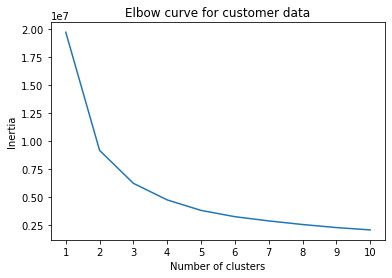

In [16]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

Ideal number of Clusters: 3

In [17]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [20]:
 clusters = get_clusters(3, df_survival[['age', 'bmi','cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'hospital_death']])

/var/folders/13/kd_r0llj6fs2w1lbk0c_lkh80000gn/T/ipykernel_56663/2400837161.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["class"] = model.labels_


In [22]:
df = clusters
clusters

,age,bmi,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,class
0,68.0,22.730000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
1,77.0,27.420000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,67.0,27.560000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2
3,72.0,28.257052,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
4,46.0,25.845717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
56930,47.0,51.439842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
56931,54.0,19.770448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
56932,75.0,23.060250,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
56933,56.0,47.179671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2


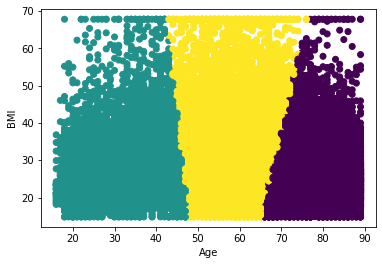

In [23]:
plt.scatter(df['age'], df['bmi'], c=df['class'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()